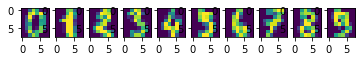

In [32]:
from sklearn.datasets import load_digits
digits = load_digits()
# Affichage des 10 premières images
import matplotlib.pyplot as plt
fig = plt.figure()
for i, digit in enumerate(digits.images[:10]):
    fig.add_subplot(1,10,i+1)
    plt.imshow(digit)
plt.show()

In [33]:
import numpy as np
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
X, y = digits.data, digits.target
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)
accuracy = clf.score(X,y)
print(accuracy)

1.0


In [34]:
from sklearn.model_selection import train_test_split
# 90% des données pour le test, 10% pour l'apprentissage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.6718170580964153


In [35]:
#calcul de la variance accuracy sur 100 tirages
val=100
accur=list()
for i in range (val):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
        clf = tree.DecisionTreeClassifier()
        clf.fit(X_train, y_train)
        Z = clf.predict(X_test)
        accuracy = clf.score(X_test,y_test)
        accur.append(accuracy)
print(accur)
          
   

[0.7088998763906057, 0.7181705809641533, 0.7212608158220025, 0.7262051915945612, 0.7088998763906057, 0.7033374536464772, 0.6804697156983931, 0.703955500618047, 0.6551297898640297, 0.6903584672435105, 0.7119901112484549, 0.707663782447466, 0.6996291718170581, 0.707663782447466, 0.646477132262052, 0.6674907292954264, 0.6841779975278122, 0.6860321384425216, 0.7082818294190358, 0.6705809641532756, 0.6903584672435105, 0.6668726823238567, 0.6854140914709518, 0.6878862793572311, 0.7187886279357231, 0.7194066749072929, 0.6903584672435105, 0.6662546353522868, 0.6823238566131026, 0.6266996291718171, 0.6656365883807169, 0.6971569839307787, 0.6860321384425216, 0.6953028430160693, 0.6569839307787392, 0.6644004944375772, 0.6681087762669963, 0.6940667490729295, 0.6594561186650185, 0.6526576019777504, 0.6786155747836835, 0.6835599505562423, 0.7416563658838071, 0.7132262051915945, 0.703955500618047, 0.6860321384425216, 0.7095179233621756, 0.6619283065512979, 0.7237330037082819, 0.6866501854140915, 0.71

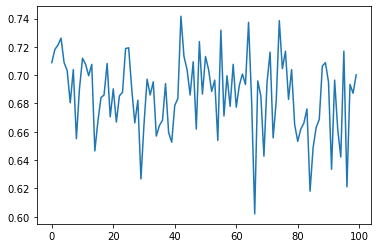

In [36]:
plt.plot(accur)

In [37]:
#calcul de la moyenne
np.mean(accur)

0.6860444993819531

In [38]:
#calcul de la variance
variance=np.std(accur)
variance

0.027074264143553302

In [39]:
#calcul de accuracy sur 100 tirages avec le classifieur Bagging
list_bagging=list()
for i in range (100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
        clf = BaggingClassifier(tree.DecisionTreeClassifier(),max_samples=0.5, max_features=0.5, n_estimators=200)
        clf.fit(X_train, y_train)
        Z = clf.predict(X_test)
        accuracy = clf.score(X_test,y_test)
        list_bagging.append(accuracy)
print(list_bagging)


[0.9023485784919654, 0.9085290482076638, 0.8974042027194067, 0.8739184177997528, 0.8986402966625463, 0.9208899876390606, 0.8868974042027195, 0.907292954264524, 0.8677379480840544, 0.8974042027194067, 0.8980222496909765, 0.9035846724351051, 0.8862793572311496, 0.9066749072929543, 0.8689740420271941, 0.8881334981458591, 0.8627935723114957, 0.9184177997527813, 0.9085290482076638, 0.8967861557478368, 0.9103831891223733, 0.9017305315203955, 0.8930778739184178, 0.8912237330037083, 0.9011124845488258, 0.907292954264524, 0.8875154511742892, 0.8838071693448702, 0.9066749072929543, 0.9011124845488258, 0.9239802224969098, 0.9184177997527813, 0.9004944375772559, 0.9122373300370828, 0.9122373300370828, 0.8906056860321384, 0.8856613102595797, 0.8912237330037083, 0.8875154511742892, 0.8559950556242274, 0.8794808405438813, 0.8603213844252163, 0.9066749072929543, 0.896168108776267, 0.8955500618046972, 0.896168108776267, 0.9017305315203955, 0.8949320148331273, 0.8967861557478368, 0.911619283065513, 0.90

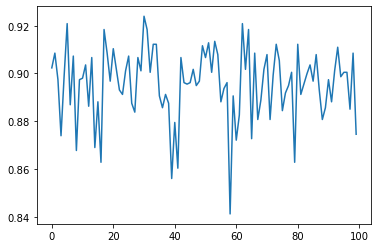

In [40]:
plt.plot(list_bagging)

In [41]:
#la variance
np.std (list_bagging)


0.014963906381562427

In [42]:
#Construction du graphe accuracy Vs n_estimators
list_bagging=list()
for i in range (1,200,10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
        clf = BaggingClassifier(tree.DecisionTreeClassifier(),max_samples=0.5, max_features=0.5, n_estimators=i)
        clf.fit(X_train, y_train)
        Z = clf.predict(X_test)
        accuracy = clf.score(X_test,y_test)
        list_bagging.append(accuracy)
print(list_bagging)


[0.5945611866501854, 0.8127317676143387, 0.8176761433868974, 0.8603213844252163, 0.8714462299134734, 0.8862793572311496, 0.9097651421508035, 0.8782447466007417, 0.9134734239802225, 0.8986402966625463, 0.9023485784919654, 0.8912237330037083, 0.8980222496909765, 0.8893695920889988, 0.9215080346106304, 0.8936959208899876, 0.9029666254635352, 0.9029666254635352, 0.8788627935723115, 0.8974042027194067]


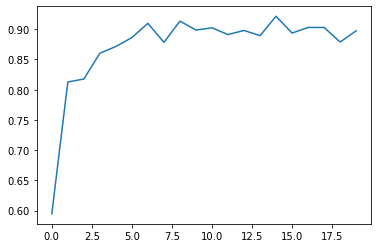

In [43]:
plt.plot(list_bagging)

In [78]:
#RECHERCHE DES PARAMÈTRES OPTIMAUX
from sklearn.model_selection import GridSearchCV

#création des paramétres
para= {'max_samples':[0.2, 0.1, 0.6, 0.3, 0.8 ], 'max_features':[0.1, 0.2, 0.7, 0.5, 0.6]}
model = BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=200)
mod= GridSearchCV(estimator=model, param_grid=para, cv=2)
mod.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                         n_estimators=200),
             param_grid={'max_features': [0.1, 0.2, 0.7, 0.5, 0.6],
                         'max_samples': [0.2, 0.1, 0.6, 0.3, 0.8]})

In [79]:
print("les valeurs de paramètres optimales sont:\n",mod.best_params_)

les valeurs de paramètres optimales sont:
 {'max_features': 0.5, 'max_samples': 0.2}


In [83]:
#TESTER LES PARAMETRES
list_bagging=list()
for i in range (100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
        clf = BaggingClassifier(tree.DecisionTreeClassifier(),max_samples=0.8, max_features=0.2, n_estimators=200)
        clf.fit(X_train, y_train)
        Z = clf.predict(X_test)
        accuracy = clf.score(X_test,y_test)
        list_bagging.append(accuracy)
print(list_bagging)


[0.8980222496909765, 0.8967861557478368, 0.9165636588380717, 0.8992583436341162, 0.8986402966625463, 0.9147095179233622, 0.8906056860321384, 0.9004944375772559, 0.915327564894932, 0.9004944375772559, 0.8868974042027195, 0.9048207663782447, 0.9221260815822002, 0.9035846724351051, 0.9048207663782447, 0.8708281829419036, 0.8967861557478368, 0.9085290482076638, 0.8893695920889988, 0.8763906056860321, 0.9091470951792336, 0.8986402966625463, 0.9196538936959209, 0.919035846724351, 0.9054388133498146, 0.9103831891223733, 0.8974042027194067, 0.9140914709517923, 0.9085290482076638, 0.9054388133498146, 0.8986402966625463, 0.9085290482076638, 0.9103831891223733, 0.9097651421508035, 0.8838071693448702, 0.8887515451174289, 0.907292954264524, 0.8733003708281829, 0.9029666254635352, 0.9196538936959209, 0.8967861557478368, 0.8992583436341162, 0.9184177997527813, 0.9171817058096415, 0.8955500618046972, 0.9165636588380717, 0.9097651421508035, 0.8763906056860321, 0.8986402966625463, 0.8955500618046972, 0.

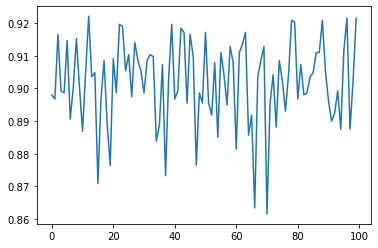

In [84]:
plt.plot(list_bagging)

In [85]:
np.std(list_bagging)

0.012798812694559097